### Matplotlib

In [119]:
%matplotlib inline    
%load_ext autoreload
%autoreload 2
# %matplotlib notebook  - for interactive visualizations
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
from common import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Figures and Axes

* Figure = container holding Axes, Graphics, Text 
* Axes = Holds data for plotting

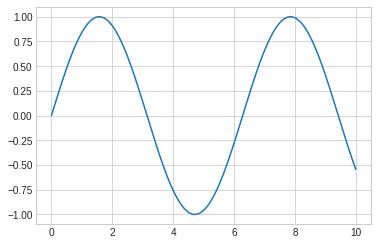

In [52]:
# Initialize the Figure and Axes
fig = plt.figure()
ax = plt.axes()

# Add the data to the Axes
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

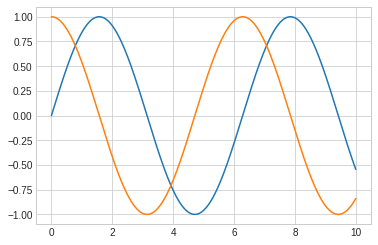

In [53]:
# Create Fig/Axes automatically 
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

### Colors

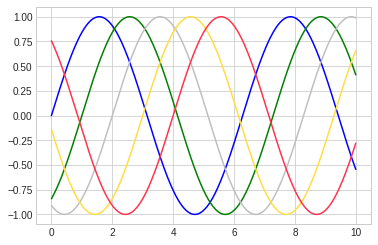

In [54]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1

### Styles

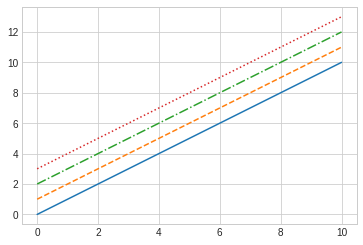

In [55]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

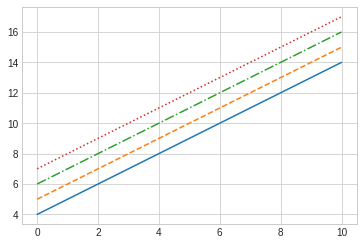

In [56]:
# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

### Plot Limits

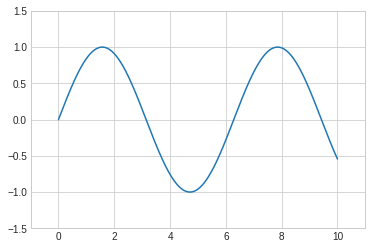

In [57]:
plt.plot(x, np.sin(x))

# If you want finer control over start/end ticks
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

### Plot Labels

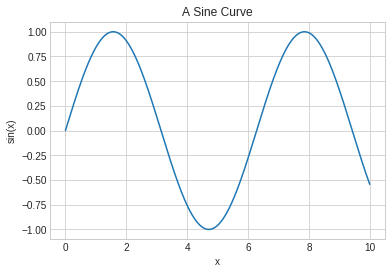

In [58]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

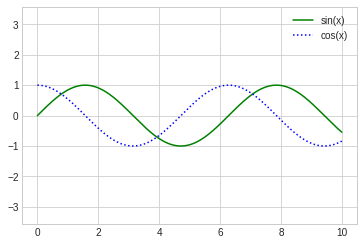

In [59]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

### Scatter Plots

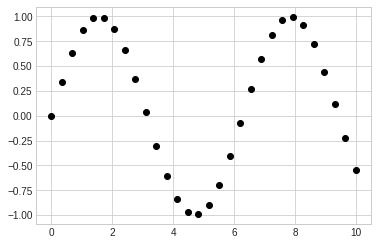

In [60]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

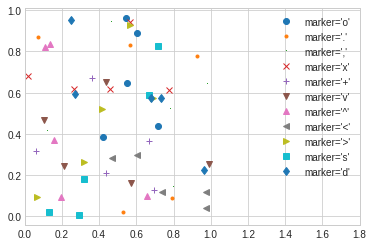

In [61]:
# Markers
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

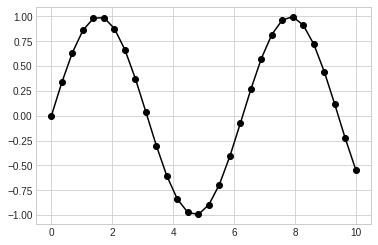

In [62]:
# Connect the dots
plt.plot(x, y, '-ok');

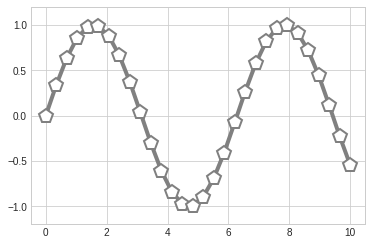

In [63]:
# Marker Specs
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

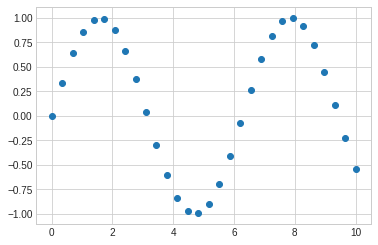

In [64]:
plt.scatter(x, y, marker='o');

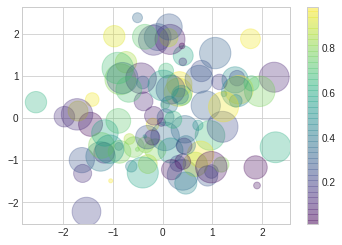

In [65]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data: the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower. Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

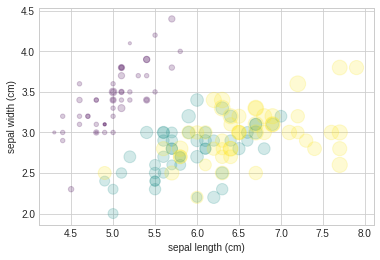

In [66]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

### Visualizing Errors

In [67]:
# Get 50 linearly spaced data between 0 and 10
x = np.linspace(0, 10, 50)
dy = 0.8   #error offset
y = np.sin(x) + dy * np.random.randn(50)

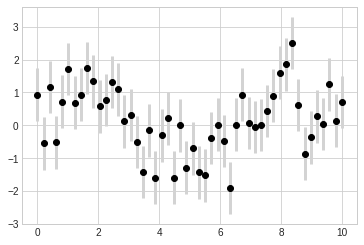

In [68]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

### Density and Contour Plots (3D data)

In [69]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

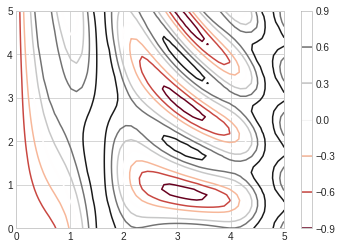

In [70]:
plt.contour(X, Y, Z, cmap='RdGy');
plt.colorbar();

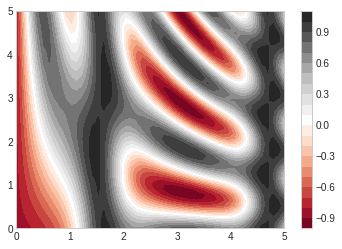

In [71]:
# Without spaces between the lines
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();
plt.axis(aspect='image'); # smooths the plot

### Histograms

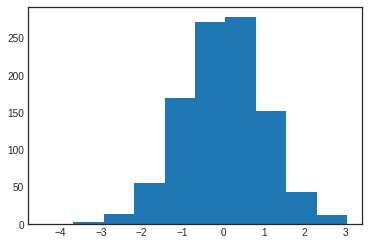

In [90]:
plt.style.use('seaborn-white')
data = np.random.randn(1000)
plt.hist(data);

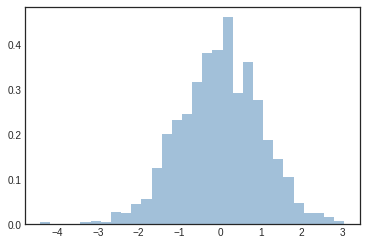

In [91]:
plt.hist(data, bins=30, normed=True, alpha=0.5, color='steelblue');

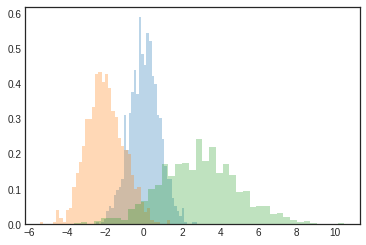

In [92]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [94]:
counts, _ = np.histogram(data, bins=5)
print(counts)

[  4  70 440 430  56]


### 2D Histograms

In [95]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

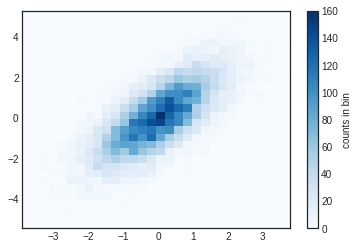

In [96]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [99]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### 3D Plotting

* https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
* To use interactive figures, you can use %matplotlib notebook rather than %matplotlib inline when running this code


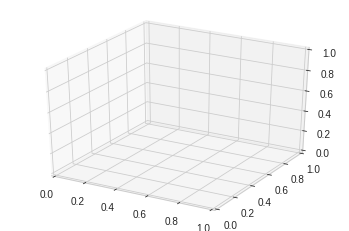

In [72]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

In [73]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

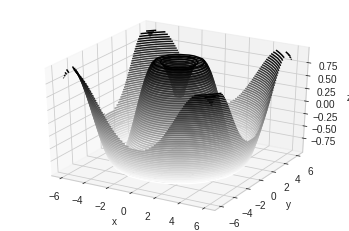

In [75]:
# Contour Plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

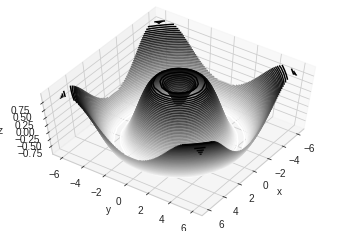

In [77]:
# Change the view
ax.view_init(60, 35)
fig

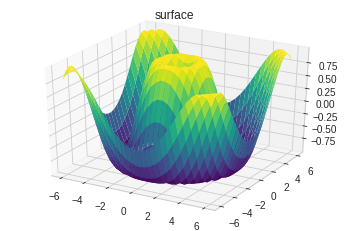

In [78]:
# Surface plot
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

### Customizing Legends

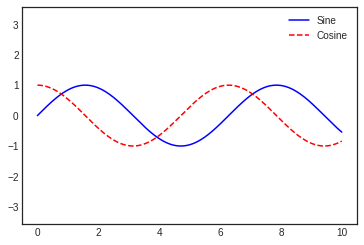

In [100]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

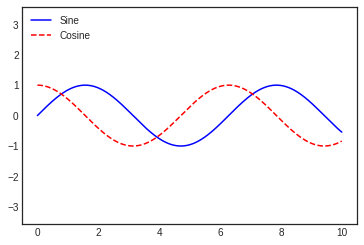

In [101]:
ax.legend(loc='upper left', frameon=False)
fig

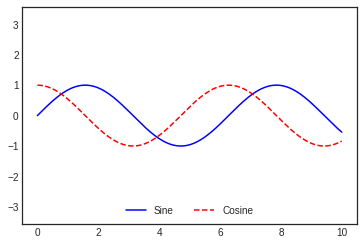

In [102]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

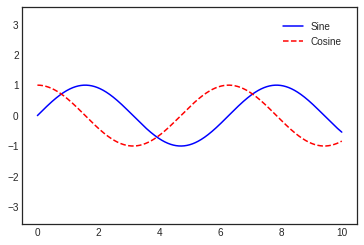

In [103]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### Colorbars

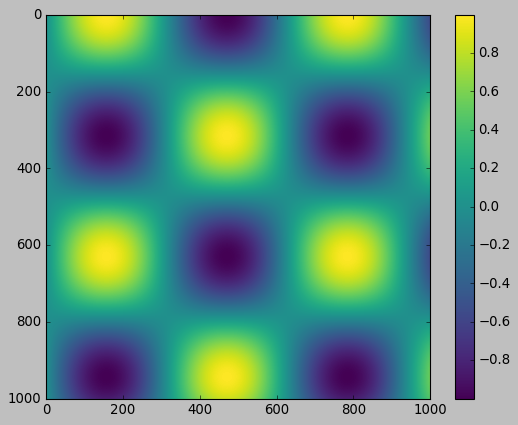

In [109]:
plt.style.use('classic')
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I, cmap='viridis')
plt.colorbar();

### Colormaps

1. Sequential colormaps: These are made up of one continuous sequence of colors (e.g., binary or viridis).
2. Divergent colormaps: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., RdBu or PuOr).
3. Qualitative colormaps: these mix colors with no particular sequence (e.g., rainbow or jet).

In [ ]:
# Viridis is a good choice visually
# It has even brightness across the range

### Subplots

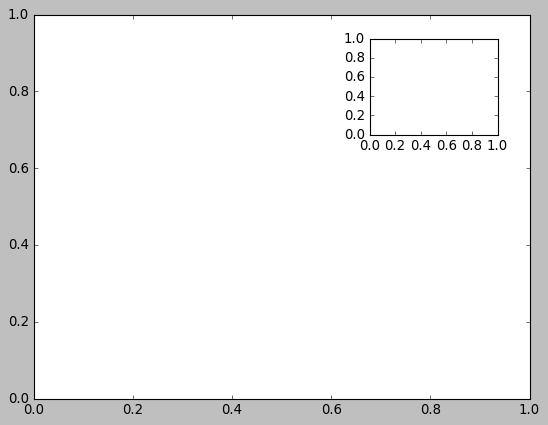

In [110]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

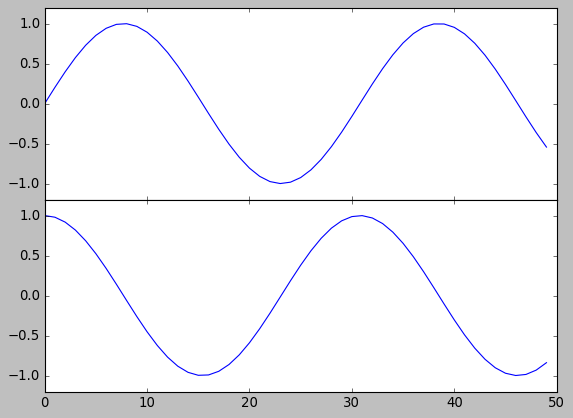

In [113]:
# Vertically stacked plots
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

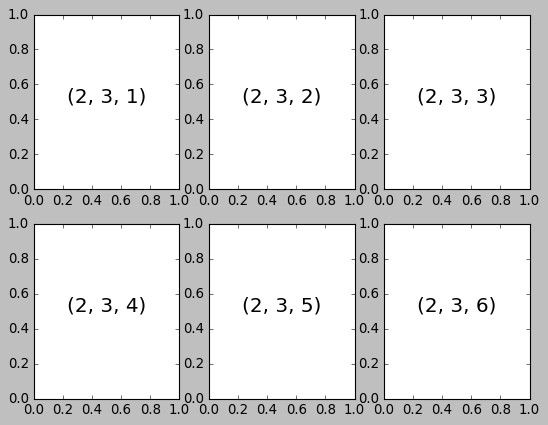

In [114]:
# Grids of subplots
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

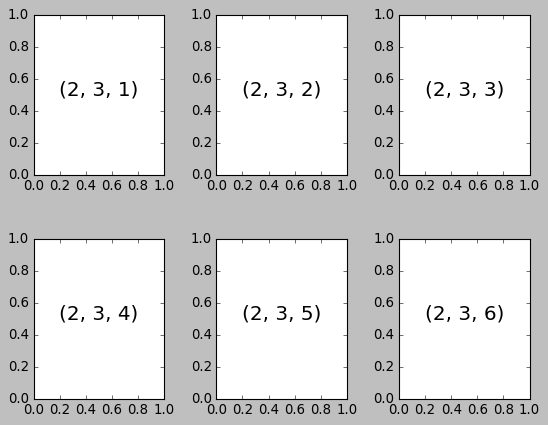

In [116]:
# Adjust spacing between subplots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

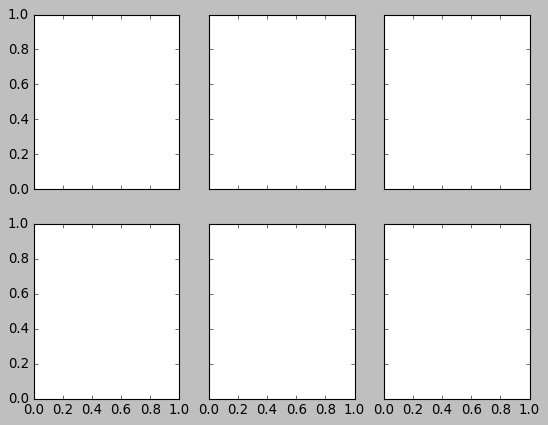

In [117]:
# Shortcut grid
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

### Text

* https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html

### Customizing Ticks

* https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html

### Geographic Data

* https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html